#### 맛보기 분석 메뉴입니다.
#### 원하는 시간대의 패스 내용을 볼 수 있습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from src.plot_utils import *

분석을 희망하는 리그의 이름을 dataset_name에 할당해주세요.
* ex) England, European_Championship, France, Germany, Italy, Spain, World_Cup
<br>
<br>
분석 희망 데이터 찾기.ipynb를 통해 찾은 match_id를 match_id에 할당해주세요.

In [2]:
match_id = 2058017
dataset_name = 'World_Cup'

In [3]:
match_events = pd.read_pickle(f'data/refined_events/{dataset_name}/{match_id}.pkl')
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2058017,263883958,1H,1.892,9598,Croatia,14943,M. Mandžukić,Pass,Simple pass,[],52.00,33.32,NaN,NaN
1,2058017,263883959,1H,3.889,9598,Croatia,69968,M. Brozović,Pass,Simple pass,[Accurate],40.56,32.64,35.36,17.68
2,2058017,263883960,1H,6.141,9598,Croatia,8287,L. Modrić,Pass,Simple pass,[Accurate],35.36,17.68,31.20,4.76
3,2058017,263883963,1H,9.227,9598,Croatia,69409,Š. Vrsaljko,Pass,Simple pass,[Accurate],31.20,4.76,11.44,23.80
4,2058017,263883964,1H,12.659,9598,Croatia,135747,D. Subašić,Pass,Launch,[Accurate],11.44,23.80,66.56,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2058017,263885652,2H,2978.302,9598,Croatia,3476,I. Rakitić,Pass,Simple pass,[Accurate],47.84,54.40,66.56,63.92
1468,2058017,263885653,2H,2979.085,9598,Croatia,14812,I. Perišić,Others on the ball,Touch,[],66.56,63.92,85.28,66.64
1469,2058017,263885654,2H,2983.449,9598,Croatia,14812,I. Perišić,Pass,Cross,"[Left foot, High, Not accurate]",85.28,66.64,104.00,34.00
1470,2058017,263885613,2H,2985.869,4418,France,25381,H. Lloris,Goalkeeper leaving line,Goalkeeper leaving line,[],0.00,34.00,14.56,38.76


In [4]:
start_time = 0  # 원하는 시작 시간을 입력하세요.(분)
end_time = 1  # 원하는 종료 시간을 입력하세요.(분)


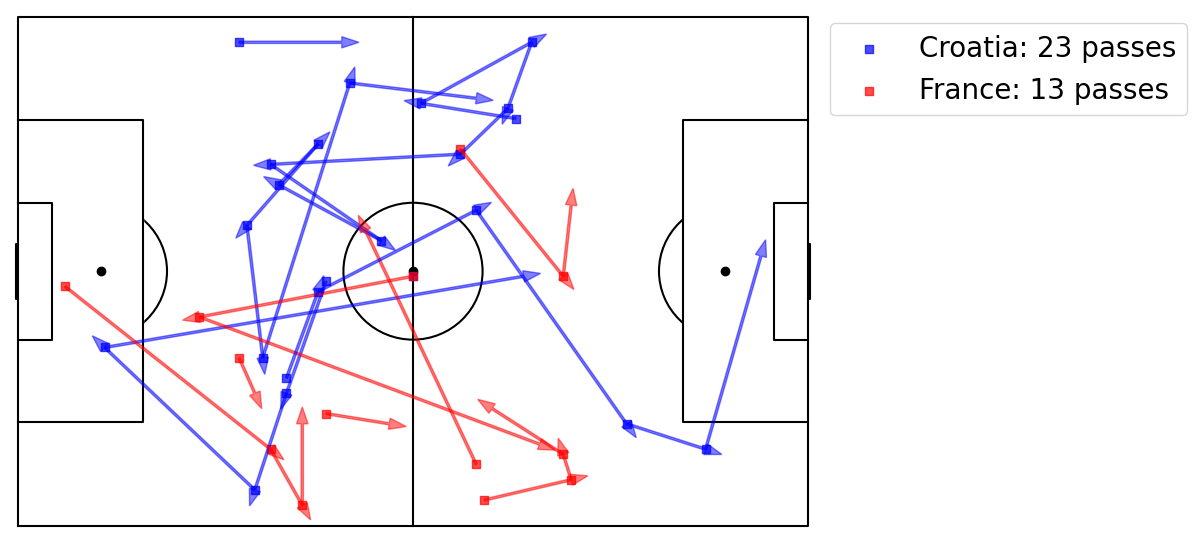

In [5]:
draw_pitch('white', 'black')
#경기장을 그려주는 코드 (인자1 = 배경색, 인자2 = 라인색)

team1_name, team2_name = match_events['team_name'].unique()
team1_events = match_events[match_events['team_name'] == team1_name]
team2_events = match_events[match_events['team_name'] == team2_name]

team2_events[['start_x', 'end_x']] = 104 - team2_events[['start_x', 'end_x']]
team2_events[['start_y', 'end_y']] = 68 - team2_events[['start_y', 'end_y']]
#양팀 같은 방향을 보고 공격하는 것으로 설정이 되어 있어 팀2의 공격 방향을 뒤집어 줌

start_time_min = start_time*60
end_time_min = end_time*60

pass_records = match_events[
    ((match_events['event_type'] == 'Pass') |
    (match_events['sub_event_type'].isin(['Free kick', 'Free kick cross', 'corner']))) &
    (match_events['time'] >= start_time_min) &
    (match_events['time'] <= end_time_min)
]     #패스 이벤트에 대해서만 필터링함 (세트피스 상황에서의 패스도 추가하기 위해 설정함)

team1_pass_records = pass_records[pass_records['team_name'] == team1_name]
team2_pass_records = pass_records[pass_records['team_name'] == team2_name]


plt.scatter(
    team1_pass_records['start_x'], team1_pass_records['start_y'], marker='s', c='blue', alpha=0.7,
    label=f'{team1_name}: {len(team1_pass_records)} passes'
)
plt.scatter(
    team2_pass_records['start_x'], team2_pass_records['start_y'], marker='s', c='red', alpha=0.7,
    label=f'{team2_name}: {len(team2_pass_records)} passes'
)

for i, record in pass_records.iterrows():
    x = record['start_x']
    y = record['start_y']
    dx = record['end_x'] - x
    dy = record['end_y'] - y
    color = 'blue' if record['team_name'] == team1_name else 'red'
    plt.arrow(x, y, dx, dy, width=0.3, head_width=1.5, color=color, alpha=0.5)

plt.legend(fontsize=20, bbox_to_anchor=(1, 1))

plt.savefig('img/pass_arrow.png', bbox_inches='tight')
plt.show()

분석 결과를 저장하고 싶으면 코드 마지막 #plt.savefig('img/pass_arrow.png', bbox_inches='tight') 주석을 제거해주세요.